In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [ ]:
pip install --upgrade seaborn -q
pip install --upgrade pandas -q

In [98]:
df = pd.read_csv('dataset.csv')

In [6]:
display(df)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


In [7]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

# Pergunta de Negócio 1:
# Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'? 


In [24]:
df_query = df[df['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda', ascending=False)
# oor
cidade_maior_venda = df[df['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum().idxmax()
display(cidade_maior_venda , df_query1)

'New York City'

,Cidade,Valor_Venda
295,New York City,68362.814
239,Los Angeles,47098.100
392,San Francisco,41771.198
406,Seattle,34856.878
335,Philadelphia,29313.687
...,...,...
316,Ormond Beach,2.808
331,Pensacola,2.214
202,Jupiter,2.064
129,Elyria,1.824


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [45]:
df_query2 = df.groupby('Data_Pedido')['Valor_Venda'].count()
df_query2

Data_Pedido
01/01/2018    10
01/02/2015     1
01/02/2017     2
01/03/2015    10
01/03/2016     7
              ..
31/10/2017     7
31/10/2018     3
31/12/2015    14
31/12/2016    11
31/12/2017     7
Name: Valor_Venda, Length: 1226, dtype: int64

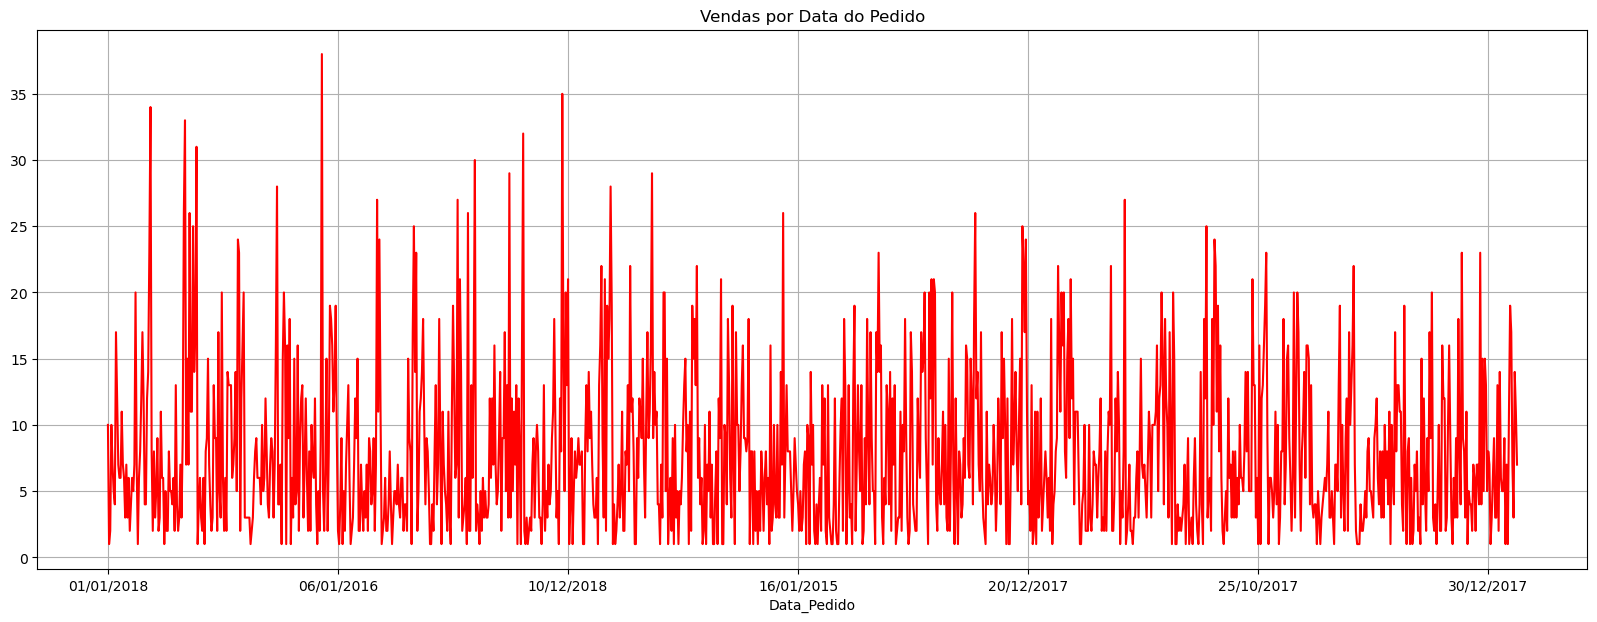

In [47]:
plt.figure(figsize = (20,7))
df_query2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'r', grid =True)
plt.title('Vendas por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

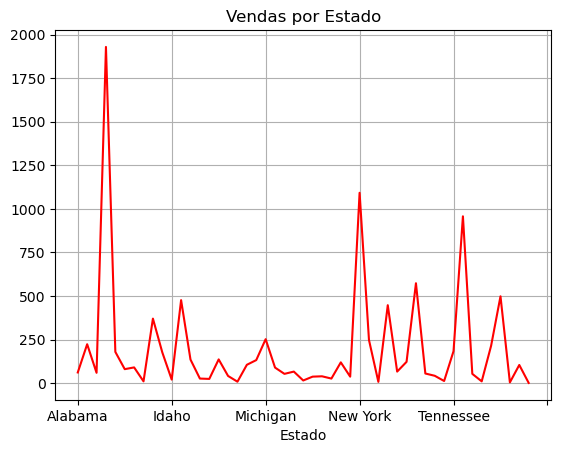

In [53]:
df_query3 = df.groupby('Estado')['Valor_Venda'].count()
df_query3.plot(x = 'Estado', y = 'Valor_Venda', color = 'r', grid =True)
plt.title('Vendas por Estado')
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

<function matplotlib.pyplot.show(close=None, block=None)>

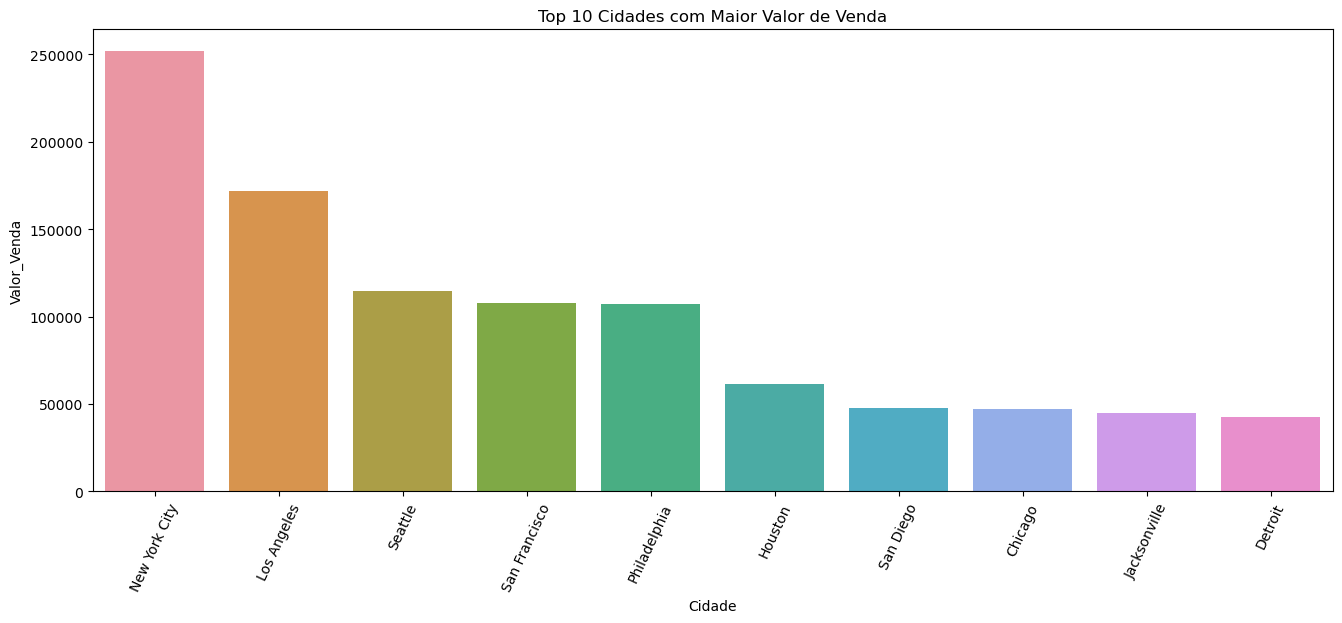

In [88]:
df_query4 = (
    df.groupby('Cidade')['Valor_Venda']  
    .sum()                              
    .reset_index()                      
    .sort_values(by='Valor_Venda', ascending=False)
    .head(10)
)

plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_query4, 
            y = 'Valor_Venda', 
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
# Personalizar o gráfico
plt.title('Top 10 Cidades com Maior Valor de Venda')
plt.xticks(rotation=65)
plt.show

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

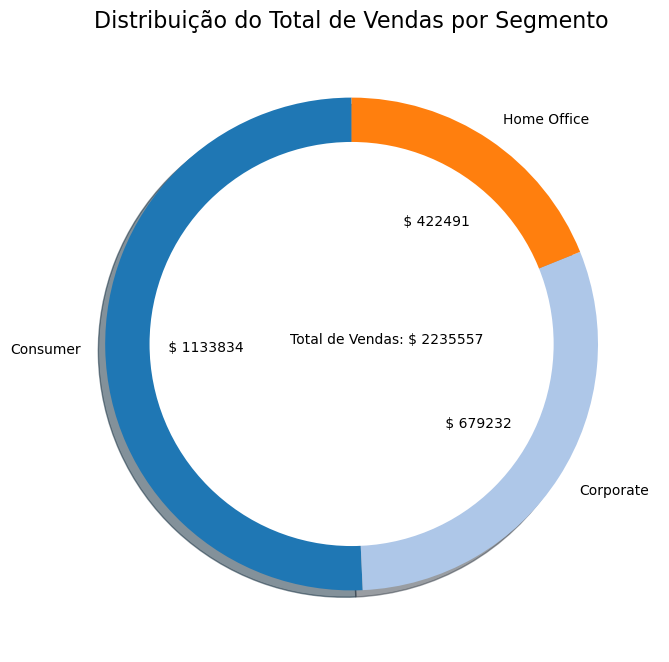

In [90]:
def autopct_format(values):
    def my_format(pct):
        total = np.sum(values)
        val = int(round(pct * total / 100.00))
        return ' $ {v:d}'.format(v = val)
    return my_format
                    

df_query5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',ascending=False).head(5)
df_query5

plt.figure(figsize=(8, 8)) 
plt.pie(df_query5['Valor_Venda'], labels=df_query5['Segmento'], autopct= autopct_format(df_query5['Valor_Venda']), colors=cores, startangle=90, shadow=True)

centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_query5['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Distribuição do Total de Vendas por Segmento', fontsize=16)
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [ ]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], format='%d/%m/%Y')
df['Ano'] = df['Data_Pedido'].dt.year

In [108]:
df['Ano'].unique().tolist()

[2017, 2016, 2015, 2018]

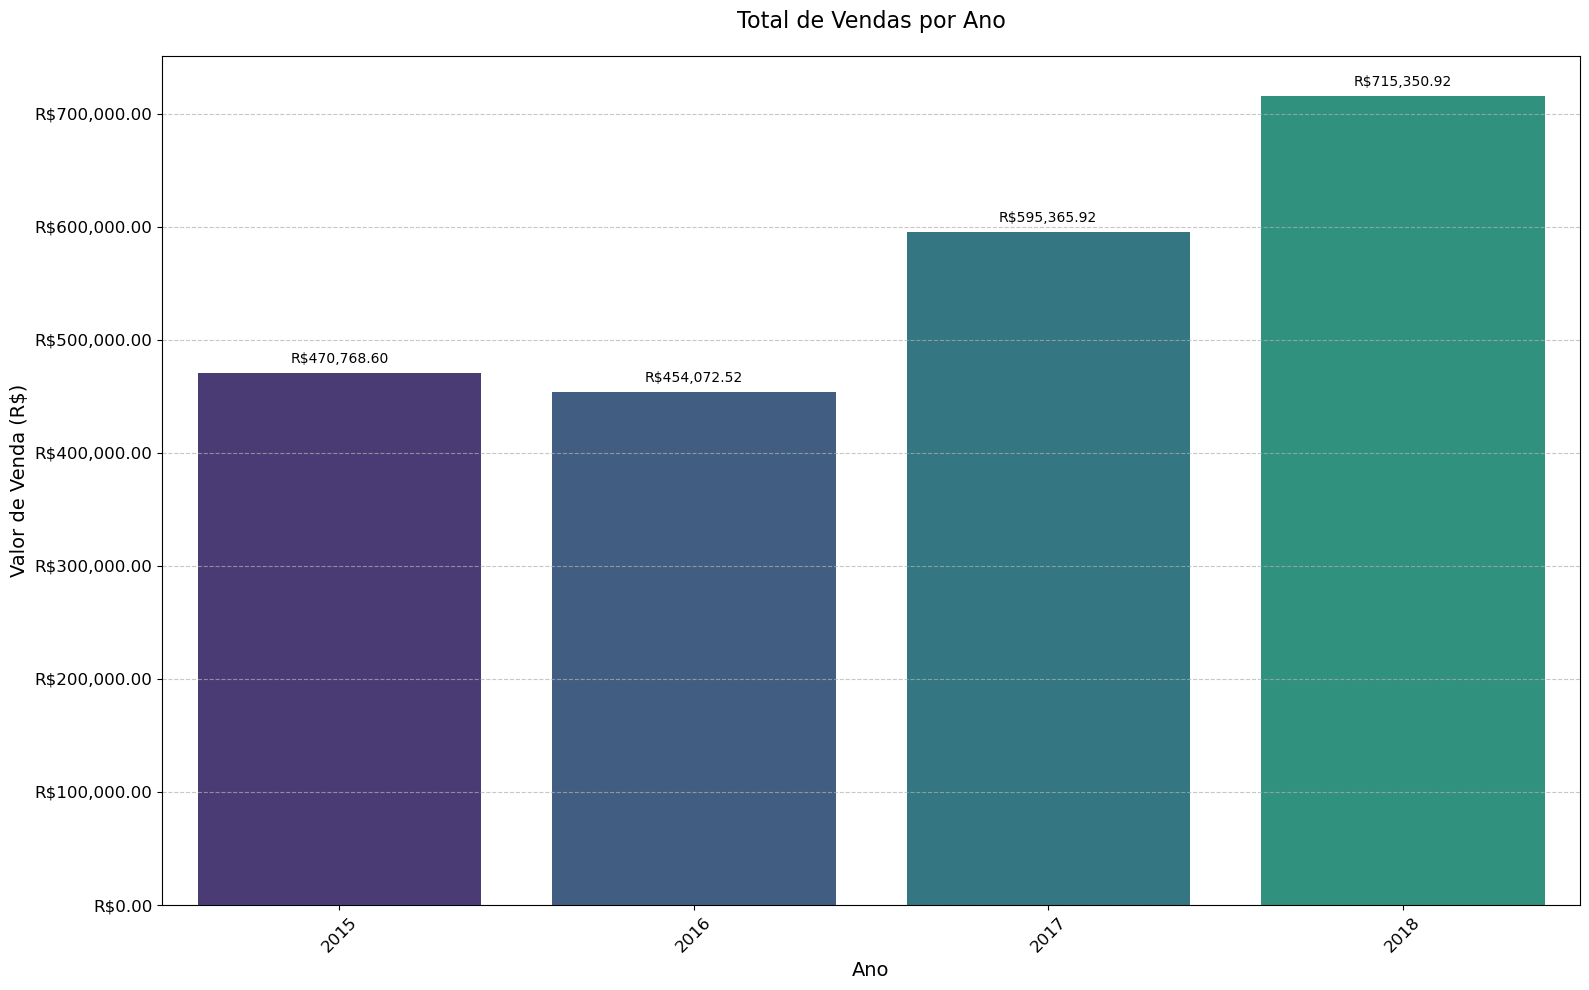

In [123]:
df_query6 = df.groupby('Ano')['Valor_Venda'].sum().reset_index().sort_values('Valor_Venda', ascending=False)

plt.figure(figsize=(16, 10))
sns.set_palette('viridis') 

ax = sns.barplot(data=df_query6, y='Valor_Venda', x='Ano')
for p in ax.patches:
    ax.annotate(f'R${p.get_height():,.2f}',  # Formatação monetária
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10)


plt.title('Total de Vendas por Ano', fontsize=16, pad=20)
plt.xlabel('Ano', fontsize=14)  
plt.ylabel('Valor de Venda (R$)', fontsize=14)  
plt.xticks(rotation=45, fontsize=12) 
plt.yticks(fontsize=12) 

plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter('R${x:,.2f}')
plt.tight_layout()
plt.show()

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [126]:
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [128]:
print('457 Vendas receberiam 15% de desconto')

457 Vendas receberiam 15% de desconto


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,0.1
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,0.1
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,0.1
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017,0.1


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [152]:
df_query8 = df[df['Desconto'] == 0.15]
media_antes = np.mean(df_query8['Valor_Venda'])
media_antes
print("Média das vendas antes do desconto de 15%:", round(media_antes, 2))

Média das vendas antes do desconto de 15%: 2116.81


In [153]:
depois_desconto = df_query8['Valor_Venda'] * 0.85
media_depois = np.mean(depois_desconto)
print("Média das vendas depois do desconto de 15%:", round(media_depois, 2))

Média das vendas depois do desconto de 15%: 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [169]:
df['Mês'] = df['Data_Pedido'].dt.month
df.head(4)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Mês
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,10


In [172]:
df_media_segmento = df.groupby('Segmento')['Valor_Venda'].mean()
df_media_segmento

Segmento
Consumer       225.011775
Corporate      231.819859
Home Office    244.073618
Name: Valor_Venda, dtype: float64

In [174]:
df_media_ano = df.groupby('Ano')['Valor_Venda'].mean()
df_media_ano

Ano
2015    245.064342
2016    222.148980
2017    237.292118
2018    221.745479
Name: Valor_Venda, dtype: float64

In [176]:
df_media_mes = df.groupby('Mês')['Valor_Venda'].mean()
df_media_mes

Mês
1     259.669633
2     201.297688
3     291.913903
4     207.511879
5     214.563064
6     211.473571
7     206.537987
8     226.213737
9     221.116666
10    246.447292
11    239.403409
12    232.578272
Name: Valor_Venda, dtype: float64

In [180]:
df_query9 = df.groupby(['Ano', 'Mês', 'Segmento'])['Valor_Venda'].agg(['sum', 'mean', 'median'])
df_query9

sum        mean  median
Ano  Mês Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [183]:
anos = df_query9.index.get_level_values(0)
meses = df_query9.index.get_level_values(1)
segmentos = df_query9.index.get_level_values(2)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

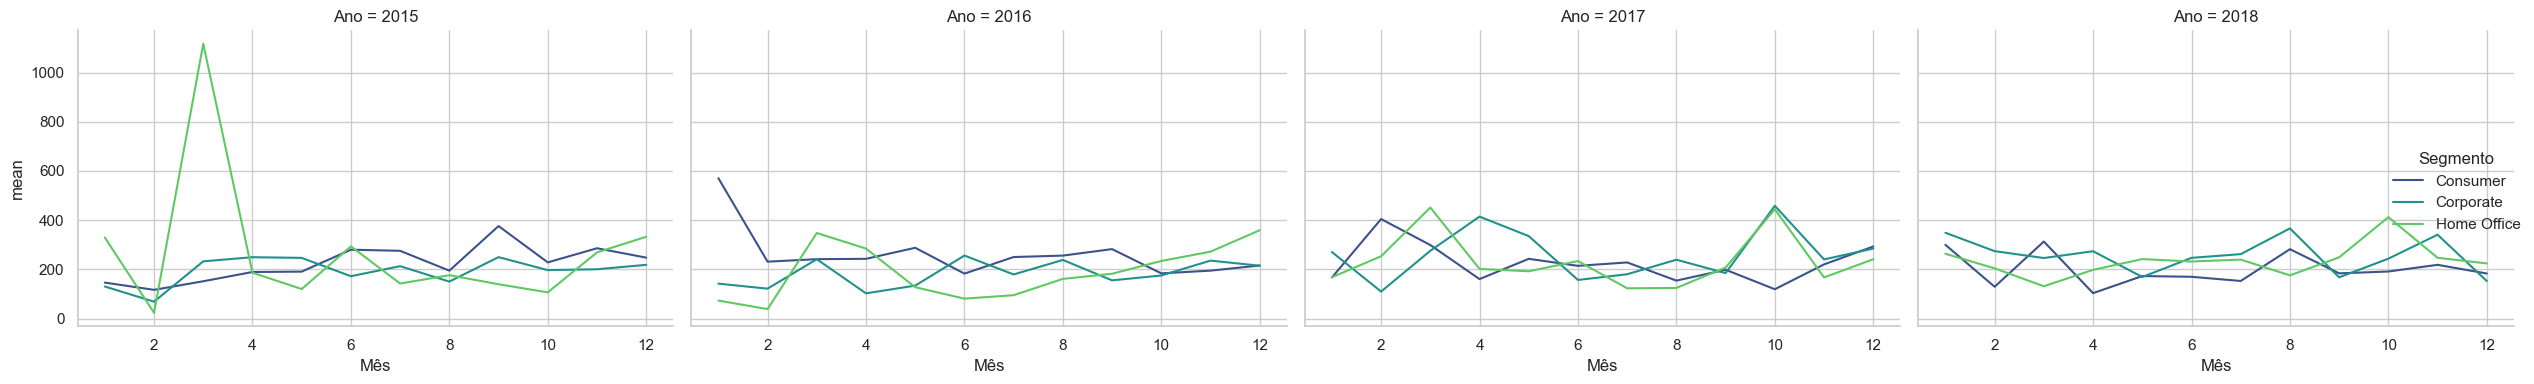

In [204]:
sns.set(style="whitegrid") 

fig1 = sns.relplot(
    data=df_query9, 
    kind='line',  
    x='Mês',      
    y='mean',    
    hue='Segmento',  
    col='Ano',    
    col_wrap=4,   
    height=4,     
    aspect=1.5,   
    palette='viridis'  
)


plt.tight_layout()
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [196]:
df_query10 = df.groupby(['Categoria','SubCategoria'])['Valor_Venda'].sum().reset_index().sort_values('Valor_Venda', ascending=False).head(12)
df_query10

,Categoria,SubCategoria,Valor_Venda
16,Technology,Phones,325271.2940
1,Furniture,Chairs,317919.6250
11,Office Supplies,Storage,216188.3620
3,Furniture,Tables,202083.3600
6,Office Supplies,Binders,194723.3810
15,Technology,Machines,189238.6310
13,Technology,Accessories,162791.3620
14,Technology,Copiers,146248.0940
0,Furniture,Bookcases,108045.0467
4,Office Supplies,Appliances,104061.6930


In [198]:
df_query10_cat = df_query10.groupby('Categoria').sum(numeric_only = True).reset_index()
df_query10_cat

,Categoria,Valor_Venda
0,Furniture,716910.8017
1,Office Supplies,591286.2000
2,Technology,823549.3810


In [199]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [201]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

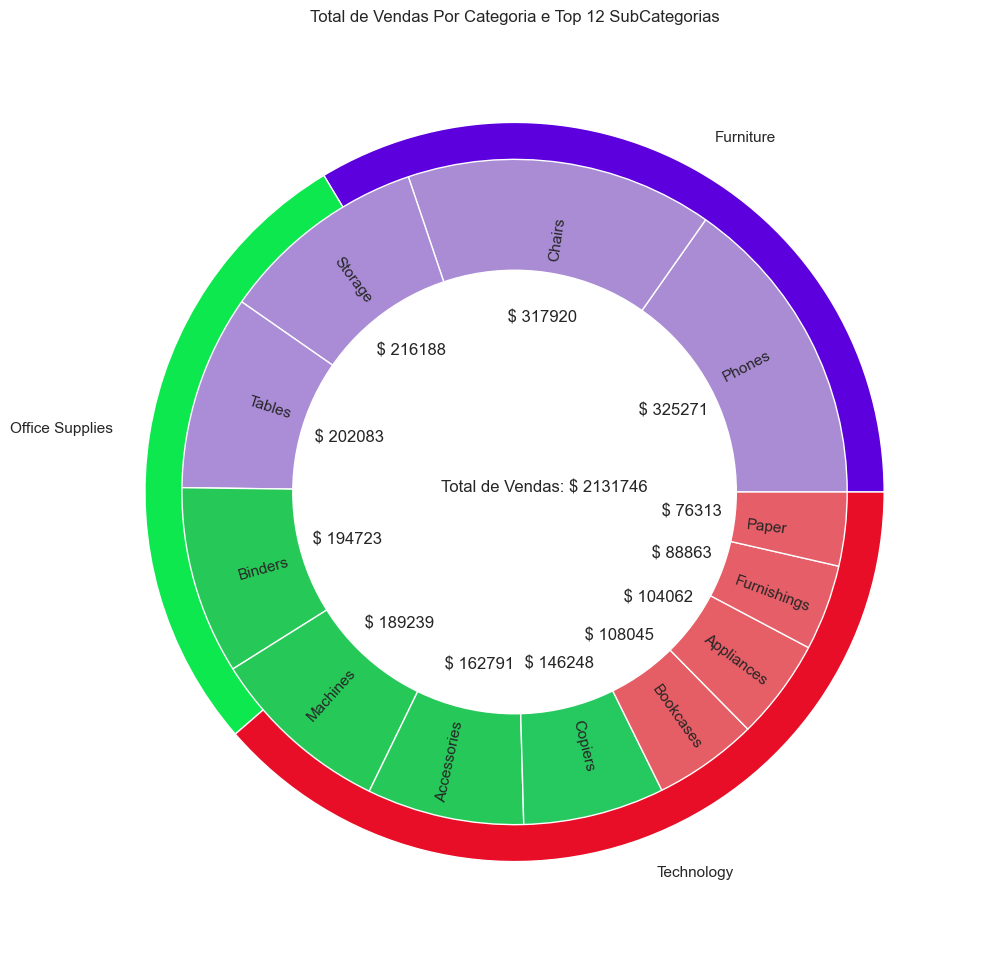

In [203]:

fig, ax = plt.subplots(figsize = (18,12))

p1 = ax.pie(df_query10_cat['Valor_Venda'], 
            radius = 1,
            labels = df_query10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_query10['Valor_Venda'],
            radius = 0.9,
            labels = df_query10['SubCategoria'],
            autopct = autopct_format(df_query10['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_query10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()